Project: prediction of the mechanical properties using the alloy composition and temperature.



Conclusion: random forest regression has showed best performance for this task. Data scaling, outliers removal and skewness amendmend have sensibly improved the performance.

Methods: machine learning and deep learning

Dataset: "Mechanical properties of low alloy steels" from Kaggle, Contains alloy composition, temperature and mechanical properties

Context: currently there are no precise theoretical methods to predict mechanical properties of steels. All the methods available are by backed by statistics and extensive physical testing of the materials. Since testing each material with different composition is a highly tedious task (imagine the number of possibilities!), let's apply our knowledge of machine learning and statistics to solve this problem.

Content: this dataset contains compositions by weight percentages of low-alloy steels along with the temperatures at which the steels were tested and the values mechanical properties observed during the tests. The alloy code is a string unique to each alloy. Weight percentages of alloying metals and impurities like Aluminum, copper, manganese, nitrogen, nickel, cobalt, carbon, etc are given in columns. The temperature in celsius for each test is mentioned in a column. Lastly mechanical properties including tensile strength, yield strength, elongation and reduction in area are given in separate columns. The dataset contains 915 rows.

Link to the dataset:

https://www.kaggle.com/rohannemade/mechanical-properties-of-low-alloy-steels

Conclusion: random forest regression has showed best performance for this task. Data scaling, outliers removal and skewness amendmend have sensibly improved the performance.

STEP 1: Learning the dataset and feature engineering

In [ ]:
# importing libraries
import numpy as np
import pandas as pd

In [ ]:
# importing the dataset
df = pd.read_csv("MatNavi Mechanical properties of low-alloy steels.csv")

Learning the dataset and making feature engineering

In [ ]:
# showing first five rows of the dateset
df.head()

,Alloy code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,338,454,27,72
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,337,465,23,69
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,346,495,21,70
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,316,489,26,79


In [ ]:
# showing the column names
list(df.columns)

['Alloy code',
 ' C',
 ' Si',
 ' Mn',
 ' P',
 ' S',
 ' Ni',
 ' Cr',
 ' Mo',
 ' Cu',
 'V',
 ' Al',
 ' N',
 'Ceq',
 'Nb + Ta',
 ' Temperature (°C)',
 ' 0.2% Proof Stress (MPa)',
 ' Tensile Strength (MPa)',
 ' Elongation (%)',
 ' Reduction in Area (%)']

In [ ]:
# editing the column names
new_list = {' C': 'C',
            ' Si': 'Si',
            ' Mn': 'Mn',
            ' P': 'P',
            ' S': 'S',
            ' Ni': 'Ni',
            ' Cr': 'Cr',
            ' Mo': 'Mo',
            ' Cu': 'Cu', 
            ' Al': 'Al',
            ' N': 'N', 
            ' Temperature (°C)': 'Temperature (°C)',
            ' 0.2% Proof Stress (MPa)': '0.2% Proof Stress (MPa)',
            ' Tensile Strength (MPa)': 'Tensile Strength (MPa)',
            ' Elongation (%)': 'Elongation (%)', 
            ' Reduction in Area (%)': 'Reduction in Area (%)'}
df.rename(columns=new_list, inplace=True)
list(df.columns)

['Alloy code',
 'C',
 'Si',
 'Mn',
 'P',
 'S',
 'Ni',
 'Cr',
 'Mo',
 'Cu',
 'V',
 'Al',
 'N',
 'Ceq',
 'Nb + Ta',
 'Temperature (°C)',
 '0.2% Proof Stress (MPa)',
 'Tensile Strength (MPa)',
 'Elongation (%)',
 'Reduction in Area (%)']

In [ ]:
# showing the column names
list(df.columns)

['Alloy code',
 'C',
 'Si',
 'Mn',
 'P',
 'S',
 'Ni',
 'Cr',
 'Mo',
 'Cu',
 'V',
 'Al',
 'N',
 'Ceq',
 'Nb + Ta',
 'Temperature (°C)',
 '0.2% Proof Stress (MPa)',
 'Tensile Strength (MPa)',
 'Elongation (%)',
 'Reduction in Area (%)']

In [ ]:
# showing statistical information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Alloy code               915 non-null    object 
 1   C                        915 non-null    float64
 2   Si                       915 non-null    float64
 3   Mn                       915 non-null    float64
 4   P                        915 non-null    float64
 5   S                        915 non-null    float64
 6   Ni                       915 non-null    float64
 7   Cr                       915 non-null    float64
 8   Mo                       915 non-null    float64
 9   Cu                       915 non-null    float64
 10  V                        915 non-null    float64
 11  Al                       915 non-null    float64
 12  N                        915 non-null    float64
 13  Ceq                      915 non-null    float64
 14  Nb + Ta                  9

In [ ]:
# showing statistical data of the dataset
df.describe()

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
count,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000
mean,0.174929,0.310918,0.812962,0.014543,0.010602,0.143016,0.427861,0.442870,0.079148,0.060190,0.012435,0.007652,0.093989,0.000041,351.601093,328.218579,496.248087,26.789071,70.206557
std,0.059674,0.086871,0.342775,0.005244,0.004024,0.172746,0.457568,0.394383,0.058481,0.096403,0.013067,0.002321,0.172533,0.000261,189.714773,131.653232,239.710650,8.806595,12.389289
min,0.090000,0.180000,0.420000,0.006000,0.003000,0.000000,0.000000,0.005000,0.000000,0.000000,0.002000,0.002500,0.000000,0.000000,27.000000,27.000000,162.000000,10.000000,18.000000
25%,0.130000,0.240000,0.500000,0.010000,0.008000,0.023000,0.040000,0.050000,0.040000,0.000000,0.004000,0.006200,0.000000,0.000000,200.000000,220.000000,413.000000,20.000000,62.000000
50%,0.160000,0.300000,0.680000,0.014000,0.010000,0.050000,0.110000,0.500000,0.070000,0.000000,0.006000,0.007600,0.000000,0.000000,400.000000,290.000000,479.000000,26.000000,71.000000
75%,0.200000,0.370000,1.210000,0.018000,0.012000,0.210000,1.000000,0.560000,0.110000,0.070000,0.016000,0.009000,0.000000,0.000000,500.000000,432.500000,575.000000,31.000000,80.000000
max,0.340000,0.520000,1.480000,0.030000,0.022000,0.600000,1.310000,1.350000,0.250000,0.300000,0.050000,0.015000,0.437000,0.001700,650.000000,690.000000,6661.000000,78.000000,94.000000


In [ ]:
# removeing Alloy code column because it is for information only
df.drop('Alloy code', axis='columns', inplace=True)

In [ ]:
df.head()

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71
1,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,338,454,27,72
2,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,337,465,23,69
3,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,346,495,21,70
4,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,316,489,26,79


Visualize data columns

Explore distribution, skewness, outliers and other statistical properties

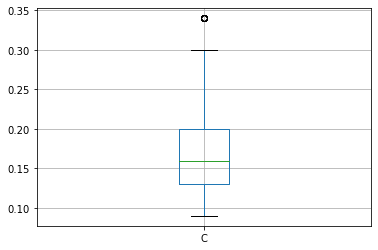

In [ ]:
# plotting C variable
boxplot = df.boxplot(column=["C"]);

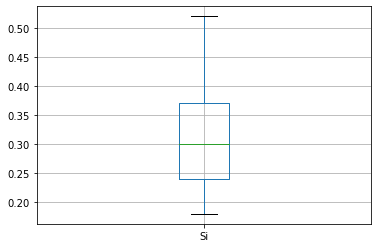

In [ ]:
# plotting Si variable
boxplot = df.boxplot(column=["Si"])

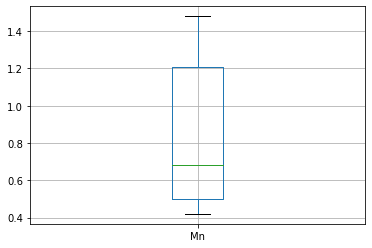

In [ ]:
# plotting Mn variable
boxplot = df.boxplot(column=["Mn"]);

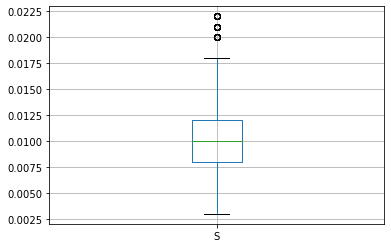

In [ ]:
# plotting S variable in descending order
boxplot = df.boxplot(column=["S"]);

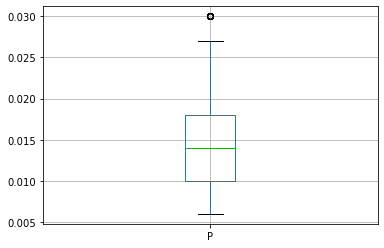

In [ ]:
# plotting P variable in descending order
boxplot = df.boxplot(column=["P"]);

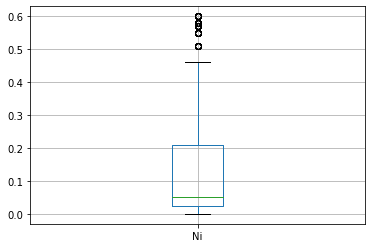

In [ ]:
# plotting Ni variable
boxplot = df.boxplot(column=["Ni"]);

<AxesSubplot:>

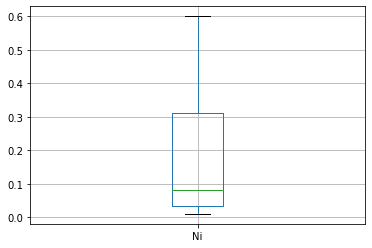

In [ ]:
# plotting non-zero Ni variable
df_Ni = df["index" and "Ni"]
df_Ni_nonzero = df_Ni[df_Ni != 0]
df_Ni_nonzero.to_frame().boxplot(column=["Ni"])

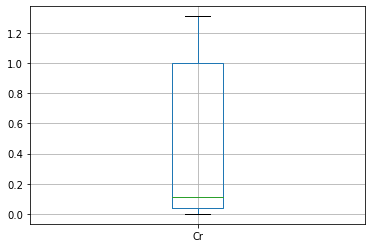

In [ ]:
# plotting Cr variable
boxplot = df.boxplot(column=["Cr"]);

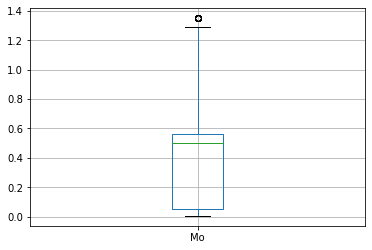

In [ ]:
# plotting Mo variable
boxplot = df.boxplot(column=["Mo"]);

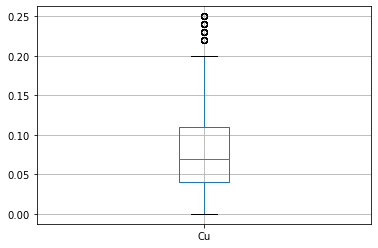

In [ ]:
# plotting Cu variable
boxplot = df.boxplot(column=["Cu"]);

In [ ]:
# calculating skewness of Al variable
cu_skewness = df["Cu"].skew()
cu_skewness

1.1991328994053938

In [ ]:
# trying log transformation to improve the skewness
log_cu_skewness = np.log(df["Cu"]).skew()
log_cu_skewness

C:\Users\artem\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


nan

In [ ]:
# trying root square transformation to improve the skewness
sqrt_cu_skewness = np.sqrt(df["Cu"]).skew()
sqrt_cu_skewness

0.1667967076334541

Square root transformation gave low skewness

In [ ]:
# creating sqrt(Cu) column
df["sqrt(Cu)"] = np.sqrt(df['Cu'])

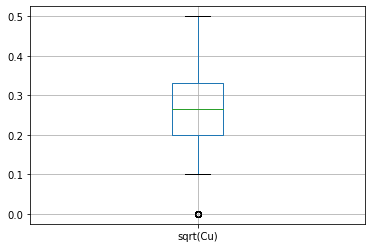

In [ ]:
# plotting sqrt(Cu) variable
boxplot = df.boxplot(column=["sqrt(Cu)"]);

In [ ]:
# removing Cu column
df.drop(["Cu"], axis=1, inplace=True)
df.head()

,C,Si,Mn,P,S,Ni,Cr,Mo,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%),sqrt(Cu)
0,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71,0.2
1,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.0,0.003,0.0066,0.0,0.0,100,338,454,27,72,0.2
2,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.0,0.003,0.0066,0.0,0.0,200,337,465,23,69,0.2
3,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.0,0.003,0.0066,0.0,0.0,300,346,495,21,70,0.2
4,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.0,0.003,0.0066,0.0,0.0,400,316,489,26,79,0.2


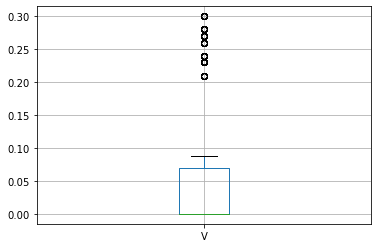

In [ ]:
# plotting V variable
boxplot = df.boxplot(column=["V"]);

<AxesSubplot:>

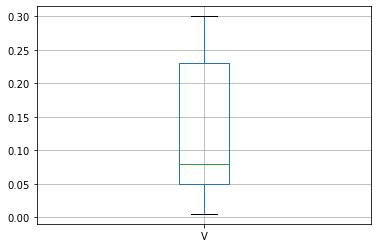

In [ ]:
# plotting non-zero V variable
df_V = df["index" and "V"]
df_V_nonzero = df_V[df_V != 0]
df_V_nonzero.to_frame().boxplot(column=["V"])

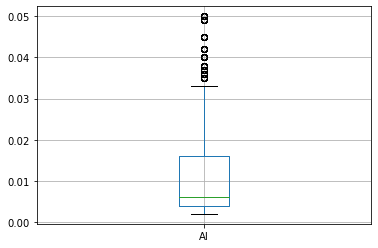

In [ ]:
# plotting Al variable
boxplot = df.boxplot(column=["Al"]);

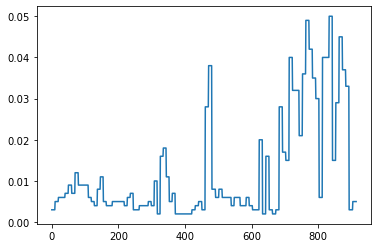

In [ ]:
# plotting Al variable
df["Al"].plot(); # There is no zewroes in Al variable

In [ ]:
# calculating skewness of Al variable
al_skewness = df["Al"].skew()
al_skewness

1.4308627801328626

Al variable is highly skewed

In [ ]:
# trying log transformation to improve the skewness
log_al_skewness = np.log(df["Al"]).skew()
log_al_skewness

0.5315337198412445

In [ ]:
# trying root square transformation to improve the skewness
sqrt_al_skewness = np.sqrt(df["Al"]).skew()
sqrt_al_skewness

1.0485828955067669

Log transformation gave better results then square root transformation

In [ ]:
# creating log(Al) column
df["log(Al)"] = np.log(df['Al'])

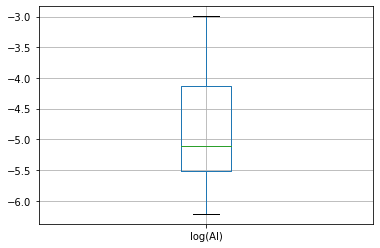

In [ ]:
# plotting log(Al) variable
boxplot = df.boxplot(column=["log(Al)"]);

In [ ]:
# removing Al column
df.drop(["Al"], axis=1, inplace=True)
df.head()

,C,Si,Mn,P,S,Ni,Cr,Mo,V,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%),sqrt(Cu),log(Al)
0,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.0,0.0066,0.0,0.0,27,342,490,30,71,0.2,-5.809143
1,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.0,0.0066,0.0,0.0,100,338,454,27,72,0.2,-5.809143
2,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.0,0.0066,0.0,0.0,200,337,465,23,69,0.2,-5.809143
3,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.0,0.0066,0.0,0.0,300,346,495,21,70,0.2,-5.809143
4,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.0,0.0066,0.0,0.0,400,316,489,26,79,0.2,-5.809143


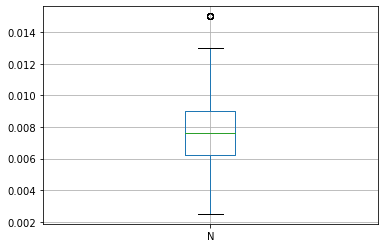

In [ ]:
# plotting N variable
boxplot = df.boxplot(column=["N"]);

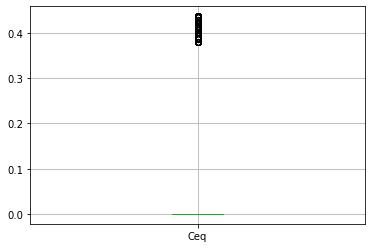

In [ ]:
# plotting Ceq variable
boxplot = df.boxplot(column=["Ceq"]);

<AxesSubplot:>

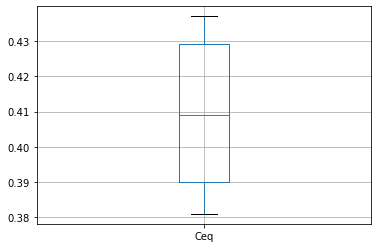

In [ ]:
# plotting Ceq non-zero variable
df_Ceq = df["index" and "Ceq"]
df_Ceq_nonzero = df_Ceq[df_Ceq != 0]
df_Ceq_nonzero.to_frame().boxplot(column=["Ceq"])

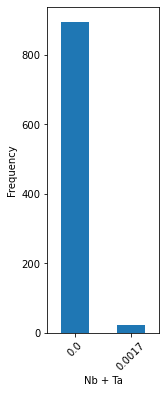

In [ ]:
# plotting Nb + Ta variable
ax = df["Nb + Ta"].value_counts().sort_index().plot.bar(xlabel="Nb + Ta", ylabel="Frequency", figsize=(2,6), rot=45);

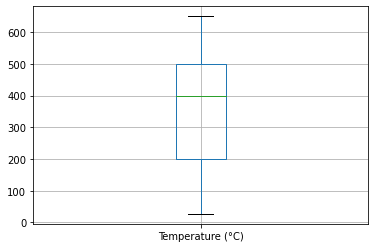

In [ ]:
# plotting Temperature (°C) variable
boxplot = df.boxplot(column=["Temperature (°C)"]);

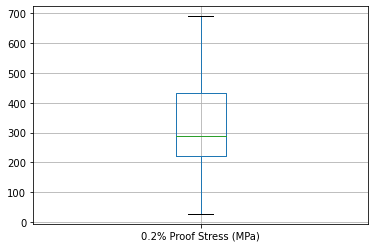

In [ ]:
# plotting 0.2% Proof Stress (MPa) variable
boxplot = df.boxplot(column=["0.2% Proof Stress (MPa)"]);

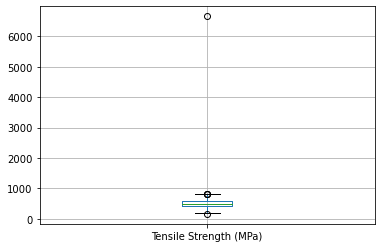

In [ ]:
# plotting Tensile Strength (MPa) variable
boxplot = df.boxplot(column=["Tensile Strength (MPa)"]);

Tensile Strength (MPa) column has an outlier. Let's detect and remove it.

In [ ]:
# detecting the outlier
df.loc[df["Tensile Strength (MPa)"] > 1000]

,C,Si,Mn,P,S,Ni,Cr,Mo,V,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%),sqrt(Cu),log(Al)
626,0.18,0.37,0.66,0.018,0.017,0.1,1.07,1.03,0.3,0.0081,0.0,0.0,300,519,6661,11,28,0.34641,-3.912023


In [ ]:
# deleting the outlier
df.drop(626, inplace=True)

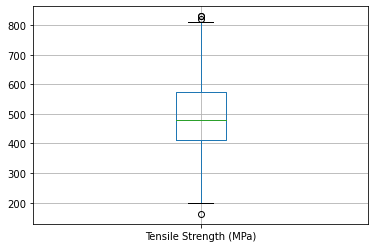

In [ ]:
# plotting Tensile Strength (MPa) variable
boxplot = df.boxplot(column=["Tensile Strength (MPa)"]);

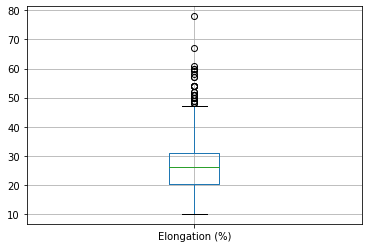

In [ ]:
# plotting Elongation (%) variable
boxplot = df.boxplot(column=["Elongation (%)"]);

In [ ]:
# calculating skewness of Elongation (%) variable
elongation_skewness = df["Elongation (%)"].skew()
elongation_skewness

1.2259226324412027

Elongation (%) variable is highly skewed

In [ ]:
# trying log transformation to improve the skewness
log_el_skewness = np.log(df["Elongation (%)"]).skew()
log_el_skewness

0.15148159255761892

Let's replace Elongation (%) variable with log(Elongation (%)) to fix the skewness

In [ ]:
# creating log(Elongation (%)) column
df["log(Elongation (%))"] = np.log(df['Elongation (%)'])

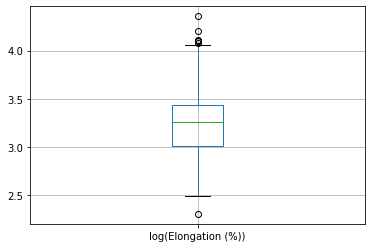

In [ ]:
# plotting log(Elongation (%)) variable
boxplot = df.boxplot(column=["log(Elongation (%))"]);

In [ ]:
# removing Elongation column
df.drop(["Elongation (%)"], axis=1, inplace=True)
df.head()

,C,Si,Mn,P,S,Ni,Cr,Mo,V,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Reduction in Area (%),sqrt(Cu),log(Al),log(Elongation (%))
0,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.0,0.0066,0.0,0.0,27,342,490,71,0.2,-5.809143,3.401197
1,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.0,0.0066,0.0,0.0,100,338,454,72,0.2,-5.809143,3.295837
2,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.0,0.0066,0.0,0.0,200,337,465,69,0.2,-5.809143,3.135494
3,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.0,0.0066,0.0,0.0,300,346,495,70,0.2,-5.809143,3.044522
4,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.0,0.0066,0.0,0.0,400,316,489,79,0.2,-5.809143,3.258097


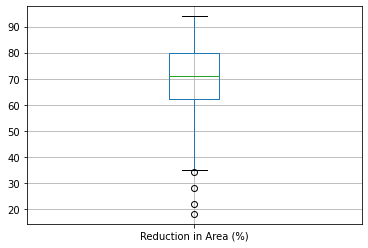

In [ ]:
# plotting Reduction in Area (%) variable
boxplot = df.boxplot(column=["Reduction in Area (%)"]);

In [ ]:
# calculating skewness of Reduction in Area (%) variable
Reduction_skewness = df["Reduction in Area (%)"].skew()
Reduction_skewness

-0.4860118362147224

Reduction in Area (%) variable is reasonably skewed

In [ ]:
# reordering the dataframe columns in original order
df = df[['C',
 'Si',
 'Mn',
 'P',
 'S',
 'Ni',
 'Cr',
 'Mo',
 'sqrt(Cu)',
 'V',
 'log(Al)',
 'N',
 'Ceq',
 'Nb + Ta',
 'Temperature (°C)',
 '0.2% Proof Stress (MPa)',
 'Tensile Strength (MPa)',
 'log(Elongation (%))',
 'Reduction in Area (%)']]

In [ ]:
df.head()

,C,Si,Mn,P,S,Ni,Cr,Mo,sqrt(Cu),V,log(Al),N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),log(Elongation (%)),Reduction in Area (%)
0,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.2,0.0,-5.809143,0.0066,0.0,0.0,27,342,490,3.401197,71
1,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.2,0.0,-5.809143,0.0066,0.0,0.0,100,338,454,3.295837,72
2,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.2,0.0,-5.809143,0.0066,0.0,0.0,200,337,465,3.135494,69
3,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.2,0.0,-5.809143,0.0066,0.0,0.0,300,346,495,3.044522,70
4,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.2,0.0,-5.809143,0.0066,0.0,0.0,400,316,489,3.258097,79


In [ ]:
# importing libraries for heatmap building 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# calculating a correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

                                C        Si        Mn         P         S  \
C                        1.000000 -0.406436  0.031060  0.057362  0.012374   
Si                      -0.406436  1.000000  0.223999  0.137729 -0.076419   
Mn                       0.031060  0.223999  1.000000  0.244273 -0.045453   
P                        0.057362  0.137729  0.244273  1.000000  0.179056   
S                        0.012374 -0.076419 -0.045453  0.179056  1.000000   
Ni                       0.285822 -0.078942  0.454138 -0.143813  0.067033   
Cr                       0.018132  0.116524 -0.474146 -0.139764  0.003919   
Mo                       0.255229 -0.028264 -0.405245 -0.387885 -0.057536   
sqrt(Cu)                 0.369701 -0.109653  0.065908 -0.038453  0.092568   
V                        0.386180  0.197927  0.008926 -0.083414  0.044347   
log(Al)                 -0.355748  0.293360  0.641921  0.278152  0.149930   
N                        0.035562 -0.123106 -0.236816 -0.256030 -0.171982   

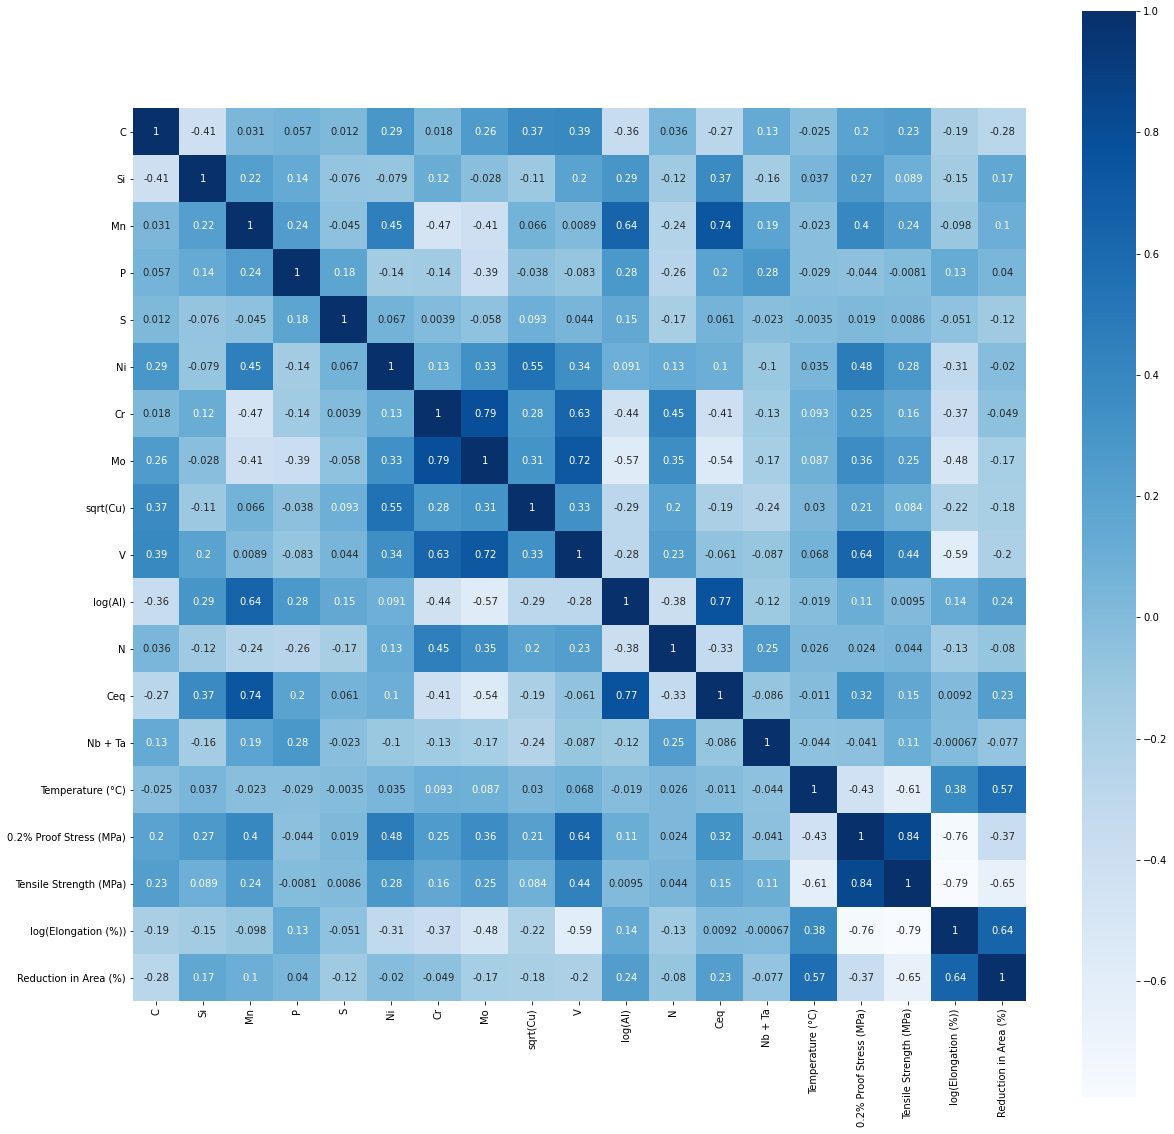

In [ ]:
# drawing a heatmap
plt.figure(figsize = (20,20))
ax = sns.heatmap(corr_matrix, annot=True, square=True, cmap='Blues')
plt.show()

STEP2: Choosing best performing machine learning model

Multiple linear regression for 0.2% Proof Stress (MPa)

In [ ]:
# defining variables
X = df.iloc[:, :-4].values
y = df.iloc[:, -4].values

In [ ]:
# splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# training the multiple Linear regression model on the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# predicting the test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=0)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[395. 257.]
 [449. 445.]
 [270. 274.]
 [219. 207.]
 [317. 270.]
 [343. 378.]
 [442. 570.]
 [515. 478.]
 [241. 264.]
 [380. 343.]
 [185. 172.]
 [352. 275.]
 [201. 194.]
 [267. 210.]
 [125. 149.]
 [168. 143.]
 [151. 156.]
 [535. 537.]
 [526. 596.]
 [294. 243.]
 [281. 268.]
 [189. 188.]
 [340. 338.]
 [353. 345.]
 [353. 241.]
 [182. 175.]
 [155. 165.]
 [323. 276.]
 [347. 251.]
 [404. 421.]
 [206. 198.]
 [438. 464.]
 [333. 275.]
 [210. 213.]
 [298. 364.]
 [275. 240.]
 [260. 323.]
 [309. 303.]
 [391. 359.]
 [266. 275.]
 [413. 284.]
 [598. 620.]
 [350. 280.]
 [327. 260.]
 [548. 570.]
 [230. 209.]
 [423. 451.]
 [537. 521.]
 [429. 447.]
 [426. 443.]
 [292. 262.]
 [260. 223.]
 [163. 240.]
 [295. 322.]
 [356. 255.]
 [324. 260.]
 [312. 352.]
 [193. 194.]
 [535. 560.]
 [365. 370.]
 [246. 280.]
 [195. 197.]
 [260. 203.]
 [210. 201.]
 [353. 301.]
 [218. 257.]
 [232. 249.]
 [263. 260.]
 [406. 459.]
 [369. 360.]
 [446. 471.]
 [317. 317.]
 [328. 367.]
 [318. 185.]
 [202. 183.]
 [315. 326.]
 [172. 179.]

In [ ]:
# test scoring
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.845619019225692

Decision tree regression for 0.2% Proof Stress (MPa)

In [ ]:
# training the decision tree regression model on the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# predicting the test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=0)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[256. 257.]
 [411. 445.]
 [228. 274.]
 [223. 207.]
 [305. 270.]
 [367. 378.]
 [591. 570.]
 [532. 478.]
 [246. 264.]
 [339. 343.]
 [176. 172.]
 [265. 275.]
 [189. 194.]
 [192. 210.]
 [152. 149.]
 [132. 143.]
 [213. 156.]
 [574. 537.]
 [579. 596.]
 [248. 243.]
 [244. 268.]
 [197. 188.]
 [328. 338.]
 [344. 345.]
 [251. 241.]
 [176. 175.]
 [153. 165.]
 [256. 276.]
 [264. 251.]
 [436. 421.]
 [194. 198.]
 [461. 464.]
 [276. 275.]
 [181. 213.]
 [367. 364.]
 [240. 240.]
 [330. 323.]
 [336. 303.]
 [403. 359.]
 [270. 275.]
 [279. 284.]
 [690. 620.]
 [260. 280.]
 [261. 260.]
 [570. 570.]
 [200. 209.]
 [415. 451.]
 [508. 521.]
 [446. 447.]
 [394. 443.]
 [271. 262.]
 [226. 223.]
 [260. 240.]
 [403. 322.]
 [276. 255.]
 [265. 260.]
 [403. 352.]
 [205. 194.]
 [566. 560.]
 [405. 370.]
 [293. 280.]
 [202. 197.]
 [226. 203.]
 [199. 201.]
 [244. 301.]
 [264. 257.]
 [252. 249.]
 [226. 260.]
 [415. 459.]
 [394. 360.]
 [459. 471.]
 [308. 317.]
 [412. 367.]
 [230. 185.]
 [183. 183.]
 [305. 326.]
 [172. 179.]

In [ ]:
# test scoring
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9216478169837741

Random forest regression for 0.2% Proof Stress (MPa)

In [ ]:
# training the random forest regression model on the training set
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# predicting the test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=0)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[265. 257.]
 [463. 445.]
 [261. 274.]
 [205. 207.]
 [281. 270.]
 [373. 378.]
 [578. 570.]
 [510. 478.]
 [243. 264.]
 [321. 343.]
 [180. 172.]
 [275. 275.]
 [190. 194.]
 [210. 210.]
 [154. 149.]
 [145. 143.]
 [184. 156.]
 [553. 537.]
 [584. 596.]
 [257. 243.]
 [270. 268.]
 [193. 188.]
 [340. 338.]
 [339. 345.]
 [259. 241.]
 [191. 175.]
 [168. 165.]
 [264. 276.]
 [252. 251.]
 [423. 421.]
 [201. 198.]
 [457. 464.]
 [282. 275.]
 [199. 213.]
 [357. 364.]
 [245. 240.]
 [328. 323.]
 [332. 303.]
 [363. 359.]
 [268. 275.]
 [273. 284.]
 [646. 620.]
 [273. 280.]
 [265. 260.]
 [563. 570.]
 [208. 209.]
 [457. 451.]
 [519. 521.]
 [446. 447.]
 [433. 443.]
 [266. 262.]
 [219. 223.]
 [242. 240.]
 [345. 322.]
 [274. 255.]
 [262. 260.]
 [353. 352.]
 [195. 194.]
 [570. 560.]
 [383. 370.]
 [273. 280.]
 [197. 197.]
 [206. 203.]
 [202. 201.]
 [288. 301.]
 [258. 257.]
 [248. 249.]
 [230. 260.]
 [431. 459.]
 [299. 360.]
 [463. 471.]
 [302. 317.]
 [384. 367.]
 [222. 185.]
 [182. 183.]
 [311. 326.]
 [186. 179.]

In [ ]:
# test scoring
from sklearn.metrics import r2_score
score_1 = r2_score(y_test, y_pred)
score_1

0.9757292171254465

Discussion: Random forest seems suitable model for this type of data.

Random forest regression for Tensile Strength (MPa)

In [ ]:
# defining variables
X = df.iloc[:, :-4].values
z = df.iloc[:, -3].values

In [ ]:
# splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size = 0.20, random_state=42)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# training the random forest regression model on the training set
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, z_train)

RandomForestRegressor()

In [ ]:
# predicting the test set results
z_pred = regressor.predict(X_test)
np.set_printoptions(precision=0)
print(np.concatenate((z_pred.reshape(len(z_pred),1), z_test.reshape(len(z_test),1)),1))

[[376. 375.]
 [583. 585.]
 [456. 450.]
 [472. 464.]
 [485. 480.]
 [521. 532.]
 [683. 670.]
 [666. 611.]
 [532. 575.]
 [473. 502.]
 [413. 385.]
 [456. 450.]
 [405. 420.]
 [480. 485.]
 [275. 249.]
 [221. 221.]
 [289. 266.]
 [681. 672.]
 [738. 746.]
 [457. 431.]
 [640. 632.]
 [482. 469.]
 [426. 424.]
 [378. 397.]
 [467. 431.]
 [380. 380.]
 [311. 314.]
 [349. 364.]
 [351. 343.]
 [507. 504.]
 [469. 460.]
 [617. 636.]
 [465. 480.]
 [344. 380.]
 [601. 624.]
 [301. 300.]
 [502. 517.]
 [433. 396.]
 [438. 416.]
 [486. 473.]
 [385. 391.]
 [805. 790.]
 [456. 430.]
 [425. 408.]
 [667. 710.]
 [358. 428.]
 [608. 618.]
 [642. 661.]
 [611. 609.]
 [582. 578.]
 [466. 471.]
 [523. 544.]
 [392. 383.]
 [419. 409.]
 [465. 470.]
 [447. 442.]
 [476. 481.]
 [469. 454.]
 [725. 716.]
 [568. 558.]
 [528. 540.]
 [505. 495.]
 [486. 487.]
 [473. 454.]
 [351. 376.]
 [474. 482.]
 [423. 416.]
 [539. 557.]
 [597. 602.]
 [432. 450.]
 [620. 637.]
 [547. 556.]
 [600. 606.]
 [306. 258.]
 [436. 426.]
 [675. 710.]
 [381. 368.]

In [ ]:
# test scoring
from sklearn.metrics import r2_score
score_2 = r2_score(z_test, z_pred)
score_2

0.9569044591308646

Random forest regression for Elongation (%)

In [ ]:
# defining variables
X = df.iloc[:, :-4].values
v = df.iloc[:, -2].values

In [ ]:
# splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, v_train, v_test = train_test_split(X, v, test_size = 0.20, random_state=42)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# training the random forest regression model on the training set
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, v_train)

RandomForestRegressor()

In [ ]:
# predicting the test set results
v_pred = regressor.predict(X_test)
np.set_printoptions(precision=1)
print(np.concatenate((v_pred.reshape(len(v_pred),1), v_test.reshape(len(v_test),1)),1))

[[3.3 3.5]
 [3.1 3.1]
 [3.2 3.2]
 [3.4 3.2]
 [3.4 3.4]
 [3.1 2.9]
 [2.9 2.8]
 [2.6 2.8]
 [3.3 3.1]
 [3.4 3.5]
 [3.4 3.5]
 [3.5 3.5]
 [3.3 3.3]
 [3.1 3.1]
 [3.8 4. ]
 [4.  3.9]
 [3.7 3.6]
 [3.  3.1]
 [2.7 2.6]
 [3.1 3.2]
 [3.3 3.3]
 [3.6 3.5]
 [3.4 3.4]
 [3.1 3.3]
 [3.5 3.6]
 [3.4 3.4]
 [3.6 3.7]
 [3.7 3.7]
 [3.6 3.3]
 [2.7 2.8]
 [3.4 3.4]
 [3.1 3.1]
 [3.5 3.5]
 [3.5 3.3]
 [3.1 3.2]
 [3.6 3.7]
 [3.3 3.3]
 [3.1 3.2]
 [3.1 2.9]
 [3.2 3.1]
 [3.3 3.2]
 [2.8 2.9]
 [3.5 3.6]
 [3.4 3.4]
 [2.8 2.7]
 [3.5 3.4]
 [3.1 3.2]
 [2.8 2.8]
 [3.2 3.2]
 [2.9 2.9]
 [3.3 3.2]
 [3.1 3. ]
 [3.4 3.3]
 [3.2 3.1]
 [3.5 3.4]
 [3.1 3.3]
 [3.2 3.2]
 [3.5 3.4]
 [2.7 2.6]
 [3.2 3.1]
 [3.  2.9]
 [3.5 3.5]
 [3.2 3.3]
 [3.3 3.3]
 [3.5 3.5]
 [3.2 3.2]
 [3.4 3.4]
 [3.  3. ]
 [3.3 3.3]
 [3.3 3.4]
 [3.  3. ]
 [3.  2.9]
 [3.  2.9]
 [3.7 3.9]
 [3.3 3.4]
 [3.  3.1]
 [3.5 3.6]
 [2.7 2.8]
 [3.4 3.4]
 [3.3 3.4]
 [3.3 3.3]
 [3.5 3.6]
 [3.5 3.6]
 [3.3 3.3]
 [2.9 2.8]
 [3.2 3.2]
 [3.3 3.3]
 [3.4 3.5]
 [3.4 3.4]
 [3.1 3.2]
 [3.2 3.3]

In [ ]:
# test scoring
from sklearn.metrics import r2_score
score_3 = r2_score(v_test, v_pred)
score_3

0.8931090400305113

Random forest regression for Reduction in Area (%)

In [ ]:
# defining variables
X = df.iloc[:, :-4].values
w = df.iloc[:, -1].values

In [ ]:
# splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, w_train, w_test = train_test_split(X, w, test_size = 0.20, random_state=42)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# training the random forest regression model on the training set
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, w_train)

RandomForestRegressor()

In [ ]:
# predicting the test set results
w_pred = regressor.predict(X_test)
np.set_printoptions(precision=1)
print(np.concatenate((w_pred.reshape(len(w_pred),1), w_test.reshape(len(w_test),1)),1))

[[90.2 91. ]
 [76.  72. ]
 [53.4 61. ]
 [61.4 63. ]
 [62.3 58. ]
 [64.2 45. ]
 [64.5 64. ]
 [45.  59. ]
 [64.4 60. ]
 [74.8 76. ]
 [83.5 85. ]
 [65.7 65. ]
 [82.7 82. ]
 [69.3 69. ]
 [80.5 83. ]
 [91.  91. ]
 [84.1 85. ]
 [69.6 71. ]
 [55.  51. ]
 [72.2 72. ]
 [63.4 65. ]
 [66.2 67. ]
 [86.2 90. ]
 [84.7 81. ]
 [75.5 76. ]
 [86.2 85. ]
 [74.1 69. ]
 [86.9 90. ]
 [81.8 89. ]
 [65.  58. ]
 [57.1 55. ]
 [67.4 64. ]
 [72.  75. ]
 [76.1 73. ]
 [50.7 52. ]
 [85.  88. ]
 [68.5 64. ]
 [76.3 79. ]
 [75.5 77. ]
 [71.  69. ]
 [91.1 89. ]
 [53.9 57. ]
 [66.4 71. ]
 [65.7 67. ]
 [45.6 36. ]
 [79.1 78. ]
 [73.6 71. ]
 [60.  62. ]
 [73.5 75. ]
 [64.7 66. ]
 [61.1 55. ]
 [50.  50. ]
 [83.  82. ]
 [78.7 78. ]
 [66.4 65. ]
 [67.  67. ]
 [72.  72. ]
 [63.4 58. ]
 [57.5 55. ]
 [60.  60. ]
 [52.  52. ]
 [64.1 65. ]
 [64.8 42. ]
 [58.9 56. ]
 [83.7 85. ]
 [74.5 73. ]
 [70.8 72. ]
 [51.8 50. ]
 [78.2 76. ]
 [84.5 83. ]
 [68.6 68. ]
 [37.5 47. ]
 [53.3 48. ]
 [82.1 82. ]
 [76.9 81. ]
 [50.7 48. ]
 [67.2 71. ]

In [ ]:
# test scoring
from sklearn.metrics import r2_score
score_4 = r2_score(w_test, w_pred)
score_4

0.8760460542544872

R squared score for random forest with default parametrs:

In [ ]:
print({"0.2% Proof Stress (MPa) score is": "{:.3f}".format(score_1)})
print({"Tensile Strength (MPa) score is": "{:.3f}".format(score_2)})
print({"log(Elongation (%)) score is": "{:.3f}".format(score_3)})
print({"Reduction in Area (%) score is": "{:.3f}".format(score_4)})

{'0.2% Proof Stress (MPa) score is': '0.976'}
{'Tensile Strength (MPa) score is': '0.957'}
{'log(Elongation (%)) score is': '0.893'}
{'Reduction in Area (%) score is': '0.876'}


Results discussion: Random forest regression has showed high level of predectibility for the both strengths and reasonably high for geometrical deformations.

STEP3: Building and optimising deep learning model

Building the ANN #1 for prediction of 0.2% Proof Stress (MPa)

In [ ]:
# importing tensorflow
import tensorflow as tf

In [ ]:
tf.__version__

'2.3.0'

In [ ]:
# initializing the ANN
ann_1 = tf.keras.models.Sequential()

In [ ]:
# showing a shape of X_train array
X_train.shape

(731, 15)

In [ ]:
# adding the input layer and the first hidden layer
ann_1.add(tf.keras.layers.Dense(units=15, activation='relu'))

In [ ]:
# adding the second hidden layer
ann_1.add(tf.keras.layers.Dense(units=240, activation='sigmoid'))

In [ ]:
# adding the third hidden layer
ann_1.add(tf.keras.layers.Dense(units=60, activation='relu'))

In [ ]:
# adding the output layer
ann_1.add(tf.keras.layers.Dense(units=1))

Training the ANN#1

In [ ]:
# compiling the ANN
ann_1.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
# training the ANN model on the Training set
ann_1.fit(X_train, y_train, batch_size = 64, epochs = 600)

Epoch 1/600
12/12 [==============================] - 0s 1ms/step - loss: 126688.9766
Epoch 2/600
12/12 [==============================] - 0s 1ms/step - loss: 123078.9297
Epoch 3/600
12/12 [==============================] - 0s 1ms/step - loss: 119402.5625
Epoch 4/600
12/12 [==============================] - 0s 1ms/step - loss: 114849.5312
Epoch 5/600
12/12 [==============================] - 0s 1ms/step - loss: 109119.5703
Epoch 6/600
12/12 [==============================] - 0s 1ms/step - loss: 101885.3047
Epoch 7/600
12/12 [==============================] - 0s 1ms/step - loss: 92999.7891
Epoch 8/600
12/12 [==============================] - 0s 1ms/step - loss: 82673.0703
Epoch 9/600
12/12 [==============================] - 0s 1ms/step - loss: 71300.7344
Epoch 10/600
12/12 [==============================] - 0s 1ms/step - loss: 59557.0469
Epoch 11/600
12/12 [==============================] - 0s 1ms/step - loss: 48556.0430
Epoch 12/600
12/12 [==============================] - 0s 1ms/step - 

Epoch 98/600
12/12 [==============================] - 0s 1000us/step - loss: 2316.5415
Epoch 99/600
12/12 [==============================] - 0s 1ms/step - loss: 2298.8459
Epoch 100/600
12/12 [==============================] - 0s 917us/step - loss: 2278.9082
Epoch 101/600
12/12 [==============================] - 0s 1ms/step - loss: 2264.8896
Epoch 102/600
12/12 [==============================] - 0s 1ms/step - loss: 2254.2375
Epoch 103/600
12/12 [==============================] - 0s 1000us/step - loss: 2240.5547
Epoch 104/600
12/12 [==============================] - 0s 1ms/step - loss: 2224.6555
Epoch 105/600
12/12 [==============================] - 0s 1ms/step - loss: 2205.6675
Epoch 106/600
12/12 [==============================] - 0s 1ms/step - loss: 2198.7969
Epoch 107/600
12/12 [==============================] - 0s 917us/step - loss: 2182.2915
Epoch 108/600
12/12 [==============================] - 0s 917us/step - loss: 2172.1606
Epoch 109/600
12/12 [==============================] - 

12/12 [==============================] - 0s 1ms/step - loss: 1313.2704
Epoch 194/600
12/12 [==============================] - 0s 1000us/step - loss: 1309.6902
Epoch 195/600
12/12 [==============================] - 0s 1ms/step - loss: 1300.4368
Epoch 196/600
12/12 [==============================] - 0s 917us/step - loss: 1298.7225
Epoch 197/600
12/12 [==============================] - 0s 1ms/step - loss: 1287.7250
Epoch 198/600
12/12 [==============================] - 0s 1ms/step - loss: 1285.9700
Epoch 199/600
12/12 [==============================] - 0s 1ms/step - loss: 1280.4242
Epoch 200/600
12/12 [==============================] - 0s 1ms/step - loss: 1272.4310
Epoch 201/600
12/12 [==============================] - 0s 1ms/step - loss: 1266.4572
Epoch 202/600
12/12 [==============================] - 0s 1ms/step - loss: 1264.3290
Epoch 203/600
12/12 [==============================] - 0s 917us/step - loss: 1263.1833
Epoch 204/600
12/12 [==============================] - 0s 1ms/step - los

12/12 [==============================] - 0s 1ms/step - loss: 1018.7348
Epoch 289/600
12/12 [==============================] - 0s 1ms/step - loss: 1015.7670
Epoch 290/600
12/12 [==============================] - 0s 1ms/step - loss: 1014.2894
Epoch 291/600
12/12 [==============================] - 0s 917us/step - loss: 1012.0892
Epoch 292/600
12/12 [==============================] - 0s 1000us/step - loss: 1007.5562
Epoch 293/600
12/12 [==============================] - 0s 1ms/step - loss: 1007.4866
Epoch 294/600
12/12 [==============================] - 0s 1ms/step - loss: 1007.8940
Epoch 295/600
12/12 [==============================] - 0s 1ms/step - loss: 1010.8490
Epoch 296/600
12/12 [==============================] - 0s 1ms/step - loss: 1010.5782
Epoch 297/600
12/12 [==============================] - 0s 1000us/step - loss: 1002.7345
Epoch 298/600
12/12 [==============================] - 0s 1ms/step - loss: 1002.3938
Epoch 299/600
12/12 [==============================] - 0s 917us/step - 

12/12 [==============================] - 0s 1ms/step - loss: 902.3057
Epoch 385/600
12/12 [==============================] - 0s 1ms/step - loss: 899.5739
Epoch 386/600
12/12 [==============================] - 0s 1ms/step - loss: 903.5525
Epoch 387/600
12/12 [==============================] - 0s 1ms/step - loss: 888.1195
Epoch 388/600
12/12 [==============================] - 0s 1ms/step - loss: 890.2316
Epoch 389/600
12/12 [==============================] - 0s 1ms/step - loss: 888.0328
Epoch 390/600
12/12 [==============================] - 0s 1ms/step - loss: 883.3478
Epoch 391/600
12/12 [==============================] - 0s 833us/step - loss: 888.0579
Epoch 392/600
12/12 [==============================] - 0s 917us/step - loss: 881.5643
Epoch 393/600
12/12 [==============================] - 0s 917us/step - loss: 880.3223
Epoch 394/600
12/12 [==============================] - 0s 1ms/step - loss: 879.7026
Epoch 395/600
12/12 [==============================] - 0s 1ms/step - loss: 881.2879


12/12 [==============================] - 0s 1ms/step - loss: 777.3140
Epoch 482/600
12/12 [==============================] - 0s 1ms/step - loss: 778.1061
Epoch 483/600
12/12 [==============================] - 0s 1ms/step - loss: 780.7036
Epoch 484/600
12/12 [==============================] - 0s 917us/step - loss: 778.0303
Epoch 485/600
12/12 [==============================] - 0s 915us/step - loss: 781.7498
Epoch 486/600
12/12 [==============================] - 0s 1000us/step - loss: 770.7382
Epoch 487/600
12/12 [==============================] - 0s 1000us/step - loss: 776.2374
Epoch 488/600
12/12 [==============================] - 0s 1ms/step - loss: 777.5175
Epoch 489/600
12/12 [==============================] - 0s 1ms/step - loss: 780.9046
Epoch 490/600
12/12 [==============================] - 0s 1ms/step - loss: 778.0004
Epoch 491/600
12/12 [==============================] - 0s 1ms/step - loss: 768.6948
Epoch 492/600
12/12 [==============================] - 0s 1ms/step - loss: 779.0

12/12 [==============================] - 0s 1ms/step - loss: 709.7457
Epoch 578/600
12/12 [==============================] - 0s 1ms/step - loss: 708.6725
Epoch 579/600
12/12 [==============================] - 0s 1ms/step - loss: 709.7686
Epoch 580/600
12/12 [==============================] - 0s 1ms/step - loss: 714.0527
Epoch 581/600
12/12 [==============================] - 0s 1000us/step - loss: 708.9967
Epoch 582/600
12/12 [==============================] - 0s 1000us/step - loss: 717.8621
Epoch 583/600
12/12 [==============================] - 0s 1000us/step - loss: 713.7488
Epoch 584/600
12/12 [==============================] - 0s 1ms/step - loss: 709.0535
Epoch 585/600
12/12 [==============================] - 0s 1ms/step - loss: 709.9012
Epoch 586/600
12/12 [==============================] - 0s 1ms/step - loss: 703.0541
Epoch 587/600
12/12 [==============================] - 0s 1ms/step - loss: 706.9166
Epoch 588/600
12/12 [==============================] - 0s 1ms/step - loss: 707.72

In [ ]:
ann_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 240)               3840      
_________________________________________________________________
dense_2 (Dense)              (None, 60)                14460     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 61        
Total params: 18,601
Trainable params: 18,601
Non-trainable params: 0
_________________________________________________________________


Predicting the results of the Test set

In [ ]:
y_pred = ann_1.predict(X_test)
np.set_printoptions(precision=2)

Scoring the ANN#1 prediction

In [ ]:
# y_test scoring
from sklearn.metrics import r2_score
ann_1_score = r2_score(y_test, y_pred)
ann_1_score

0.9483293326012925

Building the ANN #2 for prediction of Tensile Strength (MPa)

In [ ]:
# initializing the ANN
ann_2 = tf.keras.models.Sequential()

In [ ]:
# adding the input layer and the first hidden layer
ann_2.add(tf.keras.layers.Dense(units=15, activation='relu'))

In [ ]:
# adding the second hidden layer
ann_2.add(tf.keras.layers.Dense(units=240, activation='sigmoid'))

In [ ]:
# adding the third hidden layer
ann_2.add(tf.keras.layers.Dense(units=60, activation='relu'))

In [ ]:
# adding the output layer
ann_2.add(tf.keras.layers.Dense(units=1))

Training the ANN#2

In [ ]:
# compiling the ANN
ann_2.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
# training the ANN model on the Training set
ann_2.fit(X_train, z_train, batch_size = 64, epochs = 750)

Epoch 1/750
12/12 [==============================] - 0s 1ms/step - loss: 252992.4219
Epoch 2/750
12/12 [==============================] - 0s 1ms/step - loss: 246467.5469
Epoch 3/750
12/12 [==============================] - 0s 1ms/step - loss: 238296.0625
Epoch 4/750
12/12 [==============================] - 0s 1ms/step - loss: 227631.8750
Epoch 5/750
12/12 [==============================] - 0s 1ms/step - loss: 213916.7344
Epoch 6/750
12/12 [==============================] - 0s 1ms/step - loss: 196485.7344
Epoch 7/750
12/12 [==============================] - 0s 1ms/step - loss: 175148.0469
Epoch 8/750
12/12 [==============================] - 0s 1ms/step - loss: 150708.4062
Epoch 9/750
12/12 [==============================] - 0s 1ms/step - loss: 124152.2734
Epoch 10/750
12/12 [==============================] - 0s 1ms/step - loss: 97702.6797
Epoch 11/750
12/12 [==============================] - 0s 1ms/step - loss: 73439.7266
Epoch 12/750
12/12 [==============================] - 0s 1ms/step

12/12 [==============================] - 0s 1ms/step - loss: 3085.7178
Epoch 99/750
12/12 [==============================] - 0s 1ms/step - loss: 3039.9592
Epoch 100/750
12/12 [==============================] - 0s 1ms/step - loss: 2989.7234
Epoch 101/750
12/12 [==============================] - 0s 1ms/step - loss: 2939.8191
Epoch 102/750
12/12 [==============================] - 0s 1ms/step - loss: 2897.3608
Epoch 103/750
12/12 [==============================] - 0s 1ms/step - loss: 2852.5925
Epoch 104/750
12/12 [==============================] - 0s 1ms/step - loss: 2812.5112
Epoch 105/750
12/12 [==============================] - 0s 1ms/step - loss: 2768.9536
Epoch 106/750
12/12 [==============================] - 0s 999us/step - loss: 2724.6440
Epoch 107/750
12/12 [==============================] - 0s 1000us/step - loss: 2687.8623
Epoch 108/750
12/12 [==============================] - 0s 1000us/step - loss: 2647.5247
Epoch 109/750
12/12 [==============================] - 0s 1ms/step - los

12/12 [==============================] - 0s 1ms/step - loss: 1072.4374
Epoch 195/750
12/12 [==============================] - 0s 1ms/step - loss: 1074.0544
Epoch 196/750
12/12 [==============================] - 0s 1ms/step - loss: 1064.1097
Epoch 197/750
12/12 [==============================] - 0s 914us/step - loss: 1058.1736
Epoch 198/750
12/12 [==============================] - 0s 1ms/step - loss: 1055.5995
Epoch 199/750
12/12 [==============================] - 0s 1ms/step - loss: 1050.2324
Epoch 200/750
12/12 [==============================] - 0s 1ms/step - loss: 1047.2577
Epoch 201/750
12/12 [==============================] - 0s 1ms/step - loss: 1042.7173
Epoch 202/750
12/12 [==============================] - 0s 1ms/step - loss: 1044.0618
Epoch 203/750
12/12 [==============================] - 0s 1ms/step - loss: 1031.5452
Epoch 204/750
12/12 [==============================] - 0s 1ms/step - loss: 1032.4707
Epoch 205/750
12/12 [==============================] - 0s 917us/step - loss: 

12/12 [==============================] - 0s 1ms/step - loss: 829.1246
Epoch 291/750
12/12 [==============================] - 0s 1ms/step - loss: 823.6926
Epoch 292/750
12/12 [==============================] - 0s 1ms/step - loss: 827.0211
Epoch 293/750
12/12 [==============================] - 0s 1ms/step - loss: 822.3311
Epoch 294/750
12/12 [==============================] - 0s 1ms/step - loss: 819.7346
Epoch 295/750
12/12 [==============================] - 0s 1ms/step - loss: 819.3846
Epoch 296/750
12/12 [==============================] - 0s 1ms/step - loss: 816.6115
Epoch 297/750
12/12 [==============================] - 0s 1ms/step - loss: 815.5562
Epoch 298/750
12/12 [==============================] - 0s 1ms/step - loss: 811.5634
Epoch 299/750
12/12 [==============================] - 0s 917us/step - loss: 816.8972
Epoch 300/750
12/12 [==============================] - 0s 1000us/step - loss: 817.3604
Epoch 301/750
12/12 [==============================] - 0s 1ms/step - loss: 811.0664
E

12/12 [==============================] - 0s 1ms/step - loss: 725.8049
Epoch 387/750
12/12 [==============================] - 0s 1000us/step - loss: 727.9655
Epoch 388/750
12/12 [==============================] - 0s 1ms/step - loss: 728.1750
Epoch 389/750
12/12 [==============================] - 0s 1ms/step - loss: 727.5370
Epoch 390/750
12/12 [==============================] - 0s 1ms/step - loss: 730.8886
Epoch 391/750
12/12 [==============================] - 0s 1ms/step - loss: 726.1616
Epoch 392/750
12/12 [==============================] - 0s 1ms/step - loss: 725.1813
Epoch 393/750
12/12 [==============================] - 0s 1ms/step - loss: 721.9232
Epoch 394/750
12/12 [==============================] - 0s 917us/step - loss: 721.3732
Epoch 395/750
12/12 [==============================] - 0s 999us/step - loss: 720.0696
Epoch 396/750
12/12 [==============================] - 0s 918us/step - loss: 727.7012
Epoch 397/750
12/12 [==============================] - 0s 1000us/step - loss: 721

12/12 [==============================] - 0s 1ms/step - loss: 662.6512
Epoch 484/750
12/12 [==============================] - 0s 1ms/step - loss: 659.9883
Epoch 485/750
12/12 [==============================] - 0s 1ms/step - loss: 663.8937
Epoch 486/750
12/12 [==============================] - 0s 1ms/step - loss: 656.1908
Epoch 487/750
12/12 [==============================] - 0s 917us/step - loss: 651.8395
Epoch 488/750
12/12 [==============================] - 0s 1ms/step - loss: 653.5767
Epoch 489/750
12/12 [==============================] - 0s 917us/step - loss: 653.8647
Epoch 490/750
12/12 [==============================] - 0s 1ms/step - loss: 658.4102
Epoch 491/750
12/12 [==============================] - 0s 1000us/step - loss: 656.8892
Epoch 492/750
12/12 [==============================] - 0s 1ms/step - loss: 657.7935
Epoch 493/750
12/12 [==============================] - 0s 1ms/step - loss: 667.3404
Epoch 494/750
12/12 [==============================] - 0s 1ms/step - loss: 667.8904

12/12 [==============================] - 0s 1ms/step - loss: 588.2703
Epoch 581/750
12/12 [==============================] - 0s 1ms/step - loss: 593.8080
Epoch 582/750
12/12 [==============================] - 0s 1ms/step - loss: 587.1523
Epoch 583/750
12/12 [==============================] - 0s 1ms/step - loss: 602.8743
Epoch 584/750
12/12 [==============================] - 0s 1ms/step - loss: 591.6177
Epoch 585/750
12/12 [==============================] - 0s 918us/step - loss: 594.1622
Epoch 586/750
12/12 [==============================] - 0s 999us/step - loss: 595.0957
Epoch 587/750
12/12 [==============================] - 0s 1ms/step - loss: 589.4971
Epoch 588/750
12/12 [==============================] - 0s 1ms/step - loss: 586.1756
Epoch 589/750
12/12 [==============================] - 0s 1ms/step - loss: 587.4073
Epoch 590/750
12/12 [==============================] - 0s 1ms/step - loss: 586.0721
Epoch 591/750
12/12 [==============================] - 0s 1ms/step - loss: 586.7543
Ep

12/12 [==============================] - 0s 1ms/step - loss: 526.4668
Epoch 678/750
12/12 [==============================] - 0s 1ms/step - loss: 525.2618
Epoch 679/750
12/12 [==============================] - 0s 1ms/step - loss: 529.4785
Epoch 680/750
12/12 [==============================] - 0s 998us/step - loss: 527.5922
Epoch 681/750
12/12 [==============================] - 0s 1ms/step - loss: 538.8302
Epoch 682/750
12/12 [==============================] - 0s 1ms/step - loss: 529.3862
Epoch 683/750
12/12 [==============================] - 0s 1000us/step - loss: 528.3151
Epoch 684/750
12/12 [==============================] - 0s 1000us/step - loss: 522.5404
Epoch 685/750
12/12 [==============================] - 0s 1ms/step - loss: 521.5771
Epoch 686/750
12/12 [==============================] - 0s 1ms/step - loss: 522.1730
Epoch 687/750
12/12 [==============================] - 0s 1ms/step - loss: 517.4871
Epoch 688/750
12/12 [==============================] - 0s 1ms/step - loss: 521.180

Predicting the results of the Test set

In [ ]:
z_pred = ann_2.predict(X_test)
np.set_printoptions(precision=2)

Scoring the ANN#2 prediction

In [ ]:
# z_test scoring
from sklearn.metrics import r2_score
ann_2_score = r2_score(z_test, z_pred)
ann_2_score

0.9533041362511859

Building the ANN #3 for prediction of log(Elongation (%))

In [ ]:
# initializing the ANN
ann_3 = tf.keras.models.Sequential()

In [ ]:
# adding the input layer and the first hidden layer
ann_3.add(tf.keras.layers.Dense(units=15, activation='sigmoid'))

In [ ]:
# adding the second hidden layer
ann_3.add(tf.keras.layers.Dense(units=60, activation='sigmoid'))

In [ ]:
# adding the third hidden layer
ann_3.add(tf.keras.layers.Dense(units=240, activation='sigmoid'))

In [ ]:
# adding the output layer
ann_3.add(tf.keras.layers.Dense(units=1))

Training the ANN#3

In [ ]:
# compiling the ANN
ann_3.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
# training the ANN model on the Training set
ann_3.fit(X_train, v_train, batch_size = 64, epochs = 5000)

Epoch 1/5000
12/12 [==============================] - 0s 1ms/step - loss: 2.2309
Epoch 2/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.4377
Epoch 3/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.1542
Epoch 4/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.1395
Epoch 5/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.1019
Epoch 6/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0977
Epoch 7/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0941
Epoch 8/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0919
Epoch 9/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0908
Epoch 10/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0889
Epoch 11/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0873
Epoch 12/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0855
Epoch 13/5000
12/12 [====

12/12 [==============================] - 0s 1ms/step - loss: 0.0346
Epoch 101/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0345
Epoch 102/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0349
Epoch 103/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0346
Epoch 104/5000
12/12 [==============================] - 0s 1000us/step - loss: 0.0347
Epoch 105/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0346
Epoch 106/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0343
Epoch 107/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0345
Epoch 108/5000
12/12 [==============================] - 0s 917us/step - loss: 0.0344
Epoch 109/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0347
Epoch 110/5000
12/12 [==============================] - 0s 1000us/step - loss: 0.0344
Epoch 111/5000
12/12 [==============================] - 0s 917us/step - loss: 0.0346
Epoch 112

12/12 [==============================] - 0s 1ms/step - loss: 0.0257
Epoch 199/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0267
Epoch 200/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0257
Epoch 201/5000
12/12 [==============================] - 0s 998us/step - loss: 0.0258
Epoch 202/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0256
Epoch 203/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0259
Epoch 204/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0256
Epoch 205/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0251
Epoch 206/5000
12/12 [==============================] - 0s 998us/step - loss: 0.0257
Epoch 207/5000
12/12 [==============================] - 0s 917us/step - loss: 0.0250
Epoch 208/5000
12/12 [==============================] - 0s 1000us/step - loss: 0.0252
Epoch 209/5000
12/12 [==============================] - 0s 1000us/step - loss: 0.0251
Epoch 2

12/12 [==============================] - 0s 1ms/step - loss: 0.0195
Epoch 297/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0193
Epoch 298/5000
12/12 [==============================] - 0s 917us/step - loss: 0.0177
Epoch 299/5000
12/12 [==============================] - 0s 917us/step - loss: 0.0182
Epoch 300/5000
12/12 [==============================] - 0s 1000us/step - loss: 0.0178
Epoch 301/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0191
Epoch 302/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0183
Epoch 303/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0183
Epoch 304/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0174
Epoch 305/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0177
Epoch 306/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0181
Epoch 307/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0187
Epoch 308/50

12/12 [==============================] - 0s 1ms/step - loss: 0.0168
Epoch 394/5000
12/12 [==============================] - 0s 1000us/step - loss: 0.0155
Epoch 395/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 396/5000
12/12 [==============================] - 0s 917us/step - loss: 0.0150
Epoch 397/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 398/5000
12/12 [==============================] - 0s 1000us/step - loss: 0.0159
Epoch 399/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0163
Epoch 400/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0177
Epoch 401/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0192
Epoch 402/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0186
Epoch 403/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0163
Epoch 404/5000
12/12 [==============================] - 0s 917us/step - loss: 0.0152
Epoch 405

12/12 [==============================] - 0s 1000us/step - loss: 0.0145
Epoch 492/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0147
Epoch 493/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0139
Epoch 494/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0137
Epoch 495/5000
12/12 [==============================] - 0s 1000us/step - loss: 0.0150
Epoch 496/5000
12/12 [==============================] - 0s 963us/step - loss: 0.0167
Epoch 497/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0150
Epoch 498/5000
12/12 [==============================] - 0s 1000us/step - loss: 0.0137
Epoch 499/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0145
Epoch 500/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0142
Epoch 501/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0145
Epoch 502/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0173
Epoch 50

12/12 [==============================] - 0s 1ms/step - loss: 0.0129
Epoch 590/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0129
Epoch 591/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0135
Epoch 592/5000
12/12 [==============================] - 0s 1000us/step - loss: 0.0144
Epoch 593/5000
12/12 [==============================] - 0s 1000us/step - loss: 0.0142
Epoch 594/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0134
Epoch 595/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0147
Epoch 596/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0140
Epoch 597/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0136
Epoch 598/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0140
Epoch 599/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0134
Epoch 600/5000
12/12 [==============================] - 0s 917us/step - loss: 0.0151
Epoch 601/5

Epoch 687/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0132
Epoch 688/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0139
Epoch 689/5000
12/12 [==============================] - 0s 999us/step - loss: 0.0133
Epoch 690/5000
12/12 [==============================] - 0s 917us/step - loss: 0.0129
Epoch 691/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0121
Epoch 692/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0127
Epoch 693/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0133
Epoch 694/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0130
Epoch 695/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0136
Epoch 696/5000
12/12 [==============================] - 0s 917us/step - loss: 0.0130
Epoch 697/5000
12/12 [==============================] - 0s 916us/step - loss: 0.0127
Epoch 698/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0

Epoch 785/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0117
Epoch 786/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0117
Epoch 787/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0116
Epoch 788/5000
12/12 [==============================] - 0s 1000us/step - loss: 0.0118
Epoch 789/5000
12/12 [==============================] - 0s 1000us/step - loss: 0.0130
Epoch 790/5000
12/12 [==============================] - 0s 914us/step - loss: 0.0127
Epoch 791/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 792/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 793/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0147
Epoch 794/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0128
Epoch 795/5000
12/12 [==============================] - 0s 1000us/step - loss: 0.0126
Epoch 796/5000
12/12 [==============================] - 0s 917us/step - loss

12/12 [==============================] - 0s 1ms/step - loss: 0.0119
Epoch 884/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0121
Epoch 885/5000
12/12 [==============================] - 0s 996us/step - loss: 0.0117
Epoch 886/5000
12/12 [==============================] - 0s 1000us/step - loss: 0.0120
Epoch 887/5000
12/12 [==============================] - 0s 917us/step - loss: 0.0115
Epoch 888/5000
12/12 [==============================] - 0s 916us/step - loss: 0.0113
Epoch 889/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0112
Epoch 890/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 891/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0130
Epoch 892/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0121
Epoch 893/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0120
Epoch 894/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0117
Epoch 895/

12/12 [==============================] - 0s 1ms/step - loss: 0.0120
Epoch 981/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0113
Epoch 982/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0114
Epoch 983/5000
12/12 [==============================] - 0s 1000us/step - loss: 0.0112
Epoch 984/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0115
Epoch 985/5000
12/12 [==============================] - 0s 919us/step - loss: 0.0116
Epoch 986/5000
12/12 [==============================] - 0s 1000us/step - loss: 0.0125
Epoch 987/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0122
Epoch 988/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0115
Epoch 989/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0121
Epoch 990/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 991/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0114
Epoch 992/5

12/12 [==============================] - 0s 1ms/step - loss: 0.0115
Epoch 1078/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0115
Epoch 1079/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0122
Epoch 1080/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0111
Epoch 1081/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0112
Epoch 1082/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0131
Epoch 1083/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0133
Epoch 1084/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0121
Epoch 1085/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0112
Epoch 1086/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0116
Epoch 1087/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0112
Epoch 1088/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0111
Epoch 10

12/12 [==============================] - 0s 1ms/step - loss: 0.0105
Epoch 1175/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0109
Epoch 1176/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0119
Epoch 1177/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0139
Epoch 1178/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0142
Epoch 1179/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0122
Epoch 1180/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0109
Epoch 1181/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0105
Epoch 1182/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0107
Epoch 1183/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0113
Epoch 1184/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0106
Epoch 1185/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0115
Epoch 11

12/12 [==============================] - 0s 1ms/step - loss: 0.0107
Epoch 1272/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0108
Epoch 1273/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0107
Epoch 1274/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 1275/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0111
Epoch 1276/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0113
Epoch 1277/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0106
Epoch 1278/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0106
Epoch 1279/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0105
Epoch 1280/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0108
Epoch 1281/5000
12/12 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 1282/5000
12/12 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 12

12/12 [==============================] - 0s 1ms/step - loss: 0.0112
Epoch 1369/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0112
Epoch 1370/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0106
Epoch 1371/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0120
Epoch 1372/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0136
Epoch 1373/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0125
Epoch 1374/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0116
Epoch 1375/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 1376/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0110
Epoch 1377/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0106
Epoch 1378/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0111
Epoch 1379/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0107
Epoch 13

12/12 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 1466/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0105
Epoch 1467/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 1468/5000
12/12 [==============================] - 0s 917us/step - loss: 0.0114
Epoch 1469/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0107
Epoch 1470/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 1471/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0107
Epoch 1472/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 1473/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 1474/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 1475/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 1476/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0103
Epoch 

12/12 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 1563/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 1564/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0105
Epoch 1565/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 1566/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0108
Epoch 1567/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0112
Epoch 1568/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0106
Epoch 1569/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0106
Epoch 1570/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 1571/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0103
Epoch 1572/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 1573/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0101
Epoch 15

12/12 [==============================] - 0s 1ms/step - loss: 0.0107
Epoch 1660/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0105
Epoch 1661/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0103
Epoch 1662/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0100
Epoch 1663/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0100
Epoch 1664/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 1665/5000
12/12 [==============================] - 0s 1000us/step - loss: 0.0101
Epoch 1666/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 1667/5000
12/12 [==============================] - 0s 1000us/step - loss: 0.0118
Epoch 1668/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0111
Epoch 1669/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0107
Epoch 1670/5000
12/12 [==============================] - 0s 949us/step - loss: 0.0102


12/12 [==============================] - 0s 1ms/step - loss: 0.0100
Epoch 1757/5000
12/12 [==============================] - 0s 1000us/step - loss: 0.0102
Epoch 1758/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 1759/5000
12/12 [==============================] - 0s 992us/step - loss: 0.0099
Epoch 1760/5000
12/12 [==============================] - 0s 917us/step - loss: 0.0101
Epoch 1761/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0103
Epoch 1762/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0107
Epoch 1763/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0121
Epoch 1764/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0130
Epoch 1765/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0103
Epoch 1766/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0099
Epoch 1767/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0103
E

12/12 [==============================] - 0s 1ms/step - loss: 0.0108
Epoch 1854/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0100
Epoch 1855/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0103
Epoch 1856/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0106
Epoch 1857/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0099
Epoch 1858/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0100
Epoch 1859/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0098
Epoch 1860/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0106
Epoch 1861/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0103
Epoch 1862/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 1863/5000
12/12 [==============================] - 0s 1000us/step - loss: 0.0116
Epoch 1864/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0117
Epoch

12/12 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 1951/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0096
Epoch 1952/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0099
Epoch 1953/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0098
Epoch 1954/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0103
Epoch 1955/5000
12/12 [==============================] - 0s 917us/step - loss: 0.0138
Epoch 1956/5000
12/12 [==============================] - 0s 1000us/step - loss: 0.0139
Epoch 1957/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0120
Epoch 1958/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0099
Epoch 1959/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0098
Epoch 1960/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 1961/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0096
Epo

12/12 [==============================] - 0s 1ms/step - loss: 0.0099
Epoch 2048/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 2049/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0098
Epoch 2050/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0099
Epoch 2051/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0098
Epoch 2052/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0097
Epoch 2053/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0095
Epoch 2054/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0097
Epoch 2055/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0100
Epoch 2056/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 2057/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0098
Epoch 2058/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0098
Epoch 20

12/12 [==============================] - 0s 1ms/step - loss: 0.0096
Epoch 2145/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0096
Epoch 2146/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0095
Epoch 2147/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0096
Epoch 2148/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0098
Epoch 2149/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0098
Epoch 2150/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0097
Epoch 2151/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0101
Epoch 2152/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0099
Epoch 2153/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0099
Epoch 2154/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0099
Epoch 2155/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0097
Epoch 21

12/12 [==============================] - 0s 1ms/step - loss: 0.0097
Epoch 2242/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0094
Epoch 2243/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0100
Epoch 2244/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 2245/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0100
Epoch 2246/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0096
Epoch 2247/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0095
Epoch 2248/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0096
Epoch 2249/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0095
Epoch 2250/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 2251/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 2252/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0095
Epoch 22

12/12 [==============================] - 0s 1ms/step - loss: 0.0101
Epoch 2339/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0097
Epoch 2340/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 2341/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0095
Epoch 2342/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 2343/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0094
Epoch 2344/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 2345/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0095
Epoch 2346/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0094
Epoch 2347/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0099
Epoch 2348/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0111
Epoch 2349/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 23

12/12 [==============================] - 0s 1ms/step - loss: 0.0092
Epoch 2436/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 2437/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0096
Epoch 2438/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 2439/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0097
Epoch 2440/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0094
Epoch 2441/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0097
Epoch 2442/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 2443/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 2444/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0096
Epoch 2445/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0100
Epoch 2446/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 24

12/12 [==============================] - 0s 1ms/step - loss: 0.0094
Epoch 2533/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 2534/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0095
Epoch 2535/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0099
Epoch 2536/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 2537/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0094
Epoch 2538/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0092
Epoch 2539/5000
12/12 [==============================] - 0s 2ms/step - loss: 0.0092
Epoch 2540/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 2541/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 2542/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 2543/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0101
Epoch 25

12/12 [==============================] - 0s 1ms/step - loss: 0.0094
Epoch 2630/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 2631/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 2632/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0096
Epoch 2633/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0099
Epoch 2634/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0089
Epoch 2635/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0106
Epoch 2636/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0095
Epoch 2637/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 2638/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 2639/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0095
Epoch 2640/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 26

12/12 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 2727/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 2728/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0092
Epoch 2729/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 2730/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0088
Epoch 2731/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0086
Epoch 2732/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0092
Epoch 2733/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0101
Epoch 2734/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 2735/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0100
Epoch 2736/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0094
Epoch 2737/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 27

12/12 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 2824/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0095
Epoch 2825/5000
12/12 [==============================] - 0s 998us/step - loss: 0.0091
Epoch 2826/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 2827/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 2828/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0089
Epoch 2829/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0089
Epoch 2830/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0092
Epoch 2831/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0096
Epoch 2832/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0100
Epoch 2833/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0094
Epoch 2834/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 

12/12 [==============================] - 0s 1ms/step - loss: 0.0086
Epoch 2921/5000
12/12 [==============================] - 0s 1000us/step - loss: 0.0087
Epoch 2922/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0084
Epoch 2923/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0084
Epoch 2924/5000
12/12 [==============================] - 0s 1000us/step - loss: 0.0085
Epoch 2925/5000
12/12 [==============================] - 0s 1000us/step - loss: 0.0087
Epoch 2926/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 2927/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0084
Epoch 2928/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0085
Epoch 2929/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0085
Epoch 2930/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0085
Epoch 2931/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0085

12/12 [==============================] - 0s 1ms/step - loss: 0.0086
Epoch 3018/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0089
Epoch 3019/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0089
Epoch 3020/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 3021/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 3022/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0097
Epoch 3023/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0085
Epoch 3024/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0086
Epoch 3025/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 3026/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0084
Epoch 3027/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0086
Epoch 3028/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 30

12/12 [==============================] - 0s 1ms/step - loss: 0.0085
Epoch 3115/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0083
Epoch 3116/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0084
Epoch 3117/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0089
Epoch 3118/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0083
Epoch 3119/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0083
Epoch 3120/5000
12/12 [==============================] - 0s 1000us/step - loss: 0.0085
Epoch 3121/5000
12/12 [==============================] - 0s 1000us/step - loss: 0.0082
Epoch 3122/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0086
Epoch 3123/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0084
Epoch 3124/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0083
Epoch 3125/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0081
Ep

12/12 [==============================] - 0s 1ms/step - loss: 0.0088
Epoch 3212/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0083
Epoch 3213/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0080
Epoch 3214/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0081
Epoch 3215/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0084
Epoch 3216/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0085
Epoch 3217/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0083
Epoch 3218/5000
12/12 [==============================] - 0s 1000us/step - loss: 0.0084
Epoch 3219/5000
12/12 [==============================] - 0s 999us/step - loss: 0.0082
Epoch 3220/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0084
Epoch 3221/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0084
Epoch 3222/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0080
Epo

12/12 [==============================] - 0s 1ms/step - loss: 0.0081
Epoch 3309/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0086
Epoch 3310/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0080
Epoch 3311/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0085
Epoch 3312/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0080
Epoch 3313/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0080
Epoch 3314/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0079
Epoch 3315/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0080
Epoch 3316/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0080
Epoch 3317/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0081
Epoch 3318/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0083
Epoch 3319/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0086
Epoch 33

12/12 [==============================] - 0s 1ms/step - loss: 0.0079
Epoch 3406/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0079
Epoch 3407/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0079
Epoch 3408/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0078
Epoch 3409/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0081
Epoch 3410/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 3411/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0083
Epoch 3412/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0083
Epoch 3413/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 3414/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0085
Epoch 3415/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0080
Epoch 3416/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0079
Epoch 34

12/12 [==============================] - 0s 1ms/step - loss: 0.0080
Epoch 3503/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0078
Epoch 3504/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0079
Epoch 3505/5000
12/12 [==============================] - 0s 1000us/step - loss: 0.0078
Epoch 3506/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0081
Epoch 3507/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0083
Epoch 3508/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0077
Epoch 3509/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0078
Epoch 3510/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0079
Epoch 3511/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0077
Epoch 3512/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0081
Epoch 3513/5000
12/12 [==============================] - ETA: 0s - loss: 0.005 - 0s 1ms/s

12/12 [==============================] - 0s 1ms/step - loss: 0.0077
Epoch 3600/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0076
Epoch 3601/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0078
Epoch 3602/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0077
Epoch 3603/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0077
Epoch 3604/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 3605/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0081
Epoch 3606/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 3607/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0076
Epoch 3608/5000
12/12 [==============================] - 0s 1000us/step - loss: 0.0076
Epoch 3609/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0076
Epoch 3610/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch

12/12 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 3697/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0076
Epoch 3698/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0079
Epoch 3699/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0077
Epoch 3700/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0080
Epoch 3701/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 3702/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0076
Epoch 3703/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0077
Epoch 3704/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 3705/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 3706/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0076
Epoch 3707/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0076
Epoch 37

12/12 [==============================] - 0s 1ms/step - loss: 0.0076
Epoch 3794/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0076
Epoch 3795/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0074
Epoch 3796/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0076
Epoch 3797/5000
12/12 [==============================] - ETA: 0s - loss: 0.009 - 0s 1ms/step - loss: 0.0077
Epoch 3798/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0074
Epoch 3799/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0074
Epoch 3800/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0073
Epoch 3801/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0073
Epoch 3802/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0077
Epoch 3803/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 3804/5000
12/12 [==============================] - 0s 1ms/step

12/12 [==============================] - 0s 1ms/step - loss: 0.0074
Epoch 3891/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0078
Epoch 3892/5000
12/12 [==============================] - 0s 1000us/step - loss: 0.0074
Epoch 3893/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0089
Epoch 3894/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0074
Epoch 3895/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0074
Epoch 3896/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0072
Epoch 3897/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0072
Epoch 3898/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 3899/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0073
Epoch 3900/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0074
Epoch 3901/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch

12/12 [==============================] - 0s 1ms/step - loss: 0.0073
Epoch 3988/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0072
Epoch 3989/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0073
Epoch 3990/5000
12/12 [==============================] - 0s 833us/step - loss: 0.0072
Epoch 3991/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0077
Epoch 3992/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0072
Epoch 3993/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 3994/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0077
Epoch 3995/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0074
Epoch 3996/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0072
Epoch 3997/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0072
Epoch 3998/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0077
Epoch 

12/12 [==============================] - 0s 1ms/step - loss: 0.0076
Epoch 4085/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0072
Epoch 4086/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0071
Epoch 4087/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0073
Epoch 4088/5000
12/12 [==============================] - 0s 1000us/step - loss: 0.0074
Epoch 4089/5000
12/12 [==============================] - 0s 1000us/step - loss: 0.0084
Epoch 4090/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0086
Epoch 4091/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0080
Epoch 4092/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0072
Epoch 4093/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 4094/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0076
Epoch 4095/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0070
Ep

12/12 [==============================] - 0s 1ms/step - loss: 0.0070
Epoch 4182/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0071
Epoch 4183/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0070
Epoch 4184/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0071
Epoch 4185/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0074
Epoch 4186/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0074
Epoch 4187/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0069
Epoch 4188/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0069
Epoch 4189/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0069
Epoch 4190/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0072
Epoch 4191/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0073
Epoch 4192/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0072
Epoch 41

12/12 [==============================] - 0s 1ms/step - loss: 0.0071
Epoch 4279/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0070
Epoch 4280/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0069
Epoch 4281/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0078
Epoch 4282/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0071
Epoch 4283/5000
12/12 [==============================] - 0s 1000us/step - loss: 0.0070
Epoch 4284/5000
12/12 [==============================] - 0s 1000us/step - loss: 0.0069
Epoch 4285/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0069
Epoch 4286/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0070
Epoch 4287/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0070
Epoch 4288/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0069
Epoch 4289/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0071
Ep

12/12 [==============================] - 0s 1ms/step - loss: 0.0068
Epoch 4376/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0068
Epoch 4377/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0076
Epoch 4378/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0069
Epoch 4379/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0069
Epoch 4380/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0068
Epoch 4381/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0068
Epoch 4382/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0069
Epoch 4383/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0068
Epoch 4384/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0068
Epoch 4385/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0067
Epoch 4386/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0067
Epoch 43

12/12 [==============================] - 0s 1ms/step - loss: 0.0073
Epoch 4473/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0069
Epoch 4474/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0067
Epoch 4475/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0070
Epoch 4476/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0071
Epoch 4477/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0074
Epoch 4478/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0070
Epoch 4479/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0073
Epoch 4480/5000
12/12 [==============================] - 0s 1000us/step - loss: 0.0068
Epoch 4481/5000
12/12 [==============================] - 0s 1000us/step - loss: 0.0070
Epoch 4482/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0071
Epoch 4483/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0070
Ep

12/12 [==============================] - 0s 1ms/step - loss: 0.0069
Epoch 4570/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0069
Epoch 4571/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 4572/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0077
Epoch 4573/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0071
Epoch 4574/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0072
Epoch 4575/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0074
Epoch 4576/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0068
Epoch 4577/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0067
Epoch 4578/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0068
Epoch 4579/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0069
Epoch 4580/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0070
Epoch 45

12/12 [==============================] - 0s 1ms/step - loss: 0.0067
Epoch 4667/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0066
Epoch 4668/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0068
Epoch 4669/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0067
Epoch 4670/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0066
Epoch 4671/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0065
Epoch 4672/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0065
Epoch 4673/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0066
Epoch 4674/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0067
Epoch 4675/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0066
Epoch 4676/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0064
Epoch 4677/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0071
Epoch 46

12/12 [==============================] - 0s 1ms/step - loss: 0.0064
Epoch 4764/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0063
Epoch 4765/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0063
Epoch 4766/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0064
Epoch 4767/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0068
Epoch 4768/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0068
Epoch 4769/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0063
Epoch 4770/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0065
Epoch 4771/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0065
Epoch 4772/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0069
Epoch 4773/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0073
Epoch 4774/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0065
Epoch 47

12/12 [==============================] - 0s 1ms/step - loss: 0.0063
Epoch 4861/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0063
Epoch 4862/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0065
Epoch 4863/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0067
Epoch 4864/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0063
Epoch 4865/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0063
Epoch 4866/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0063
Epoch 4867/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0063
Epoch 4868/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0063
Epoch 4869/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0063
Epoch 4870/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0066
Epoch 4871/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0071
Epoch 48

12/12 [==============================] - 0s 1ms/step - loss: 0.0063
Epoch 4958/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0062
Epoch 4959/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0063
Epoch 4960/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0061
Epoch 4961/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0061
Epoch 4962/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0062
Epoch 4963/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0061
Epoch 4964/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0065
Epoch 4965/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0062
Epoch 4966/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0064
Epoch 4967/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0067
Epoch 4968/5000
12/12 [==============================] - 0s 1ms/step - loss: 0.0066
Epoch 49

Predicting the results of the Test set

In [ ]:
v_pred = ann_3.predict(X_test)
np.set_printoptions(precision=3)

Scoring the ANN#3 prediction

In [ ]:
# v_test scoring
from sklearn.metrics import r2_score
ann_3_score = r2_score(v_test, v_pred)
ann_3_score

0.8513140635378937

Building the ANN #4 for prediction of Reduction in Area (%)

In [ ]:
# initializing the ANN
ann_4 = tf.keras.models.Sequential()

In [ ]:
# adding the input layer and the first hidden layer
ann_4.add(tf.keras.layers.Dense(units=15, activation='sigmoid'))

In [ ]:
# adding the second
ann_4.add(tf.keras.layers.Dense(units=15, activation='sigmoid'))

In [ ]:
# adding the third hidden layer
ann_4.add(tf.keras.layers.Dense(units=240, activation='sigmoid'))

In [ ]:
# adding the output layer
ann_4.add(tf.keras.layers.Dense(units=1))

Training the ANN#4

In [ ]:
# compiling the ANN
ann_4.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
# training the ANN model on the Training set
ann_4.fit(X_train, w_train, batch_size = 64, epochs = 1000)

Epoch 1/1000
12/12 [==============================] - 0s 917us/step - loss: 4971.1963
Epoch 2/1000
12/12 [==============================] - 0s 1ms/step - loss: 4697.0635
Epoch 3/1000
12/12 [==============================] - 0s 1ms/step - loss: 4424.4995
Epoch 4/1000
12/12 [==============================] - 0s 1ms/step - loss: 4150.2368
Epoch 5/1000
12/12 [==============================] - 0s 1ms/step - loss: 3870.4011
Epoch 6/1000
12/12 [==============================] - 0s 1ms/step - loss: 3586.7429
Epoch 7/1000
12/12 [==============================] - 0s 1ms/step - loss: 3303.2502
Epoch 8/1000
12/12 [==============================] - 0s 1ms/step - loss: 3021.8694
Epoch 9/1000
12/12 [==============================] - 0s 1ms/step - loss: 2747.6782
Epoch 10/1000
12/12 [==============================] - 0s 1ms/step - loss: 2487.4038
Epoch 11/1000
12/12 [==============================] - 0s 1ms/step - loss: 2240.6345
Epoch 12/1000
12/12 [==============================] - 0s 1ms/step - los

12/12 [==============================] - 0s 962us/step - loss: 124.2029
Epoch 98/1000
12/12 [==============================] - 0s 916us/step - loss: 123.5169
Epoch 99/1000
12/12 [==============================] - 0s 917us/step - loss: 122.8926
Epoch 100/1000
12/12 [==============================] - 0s 1ms/step - loss: 122.1814
Epoch 101/1000
12/12 [==============================] - 0s 833us/step - loss: 121.4728
Epoch 102/1000
12/12 [==============================] - 0s 833us/step - loss: 120.7787
Epoch 103/1000
12/12 [==============================] - 0s 918us/step - loss: 120.0564
Epoch 104/1000
12/12 [==============================] - 0s 999us/step - loss: 119.3481
Epoch 105/1000
12/12 [==============================] - 0s 916us/step - loss: 118.6422
Epoch 106/1000
12/12 [==============================] - 0s 894us/step - loss: 117.8855
Epoch 107/1000
12/12 [==============================] - 0s 833us/step - loss: 117.1993
Epoch 108/1000
12/12 [==============================] - 0s 917

12/12 [==============================] - 0s 833us/step - loss: 70.5479
Epoch 193/1000
12/12 [==============================] - 0s 916us/step - loss: 70.2712
Epoch 194/1000
12/12 [==============================] - 0s 917us/step - loss: 70.0590
Epoch 195/1000
12/12 [==============================] - 0s 929us/step - loss: 69.7324
Epoch 196/1000
12/12 [==============================] - 0s 918us/step - loss: 69.4513
Epoch 197/1000
12/12 [==============================] - 0s 834us/step - loss: 69.1769
Epoch 198/1000
12/12 [==============================] - 0s 917us/step - loss: 68.9375
Epoch 199/1000
12/12 [==============================] - 0s 1ms/step - loss: 68.6643
Epoch 200/1000
12/12 [==============================] - 0s 1ms/step - loss: 68.4285
Epoch 201/1000
12/12 [==============================] - 0s 917us/step - loss: 68.1461
Epoch 202/1000
12/12 [==============================] - 0s 833us/step - loss: 67.9012
Epoch 203/1000
12/12 [==============================] - 0s 831us/step - l

12/12 [==============================] - 0s 833us/step - loss: 43.4277
Epoch 288/1000
12/12 [==============================] - 0s 915us/step - loss: 42.9850
Epoch 289/1000
12/12 [==============================] - 0s 969us/step - loss: 42.6176
Epoch 290/1000
12/12 [==============================] - 0s 833us/step - loss: 42.2844
Epoch 291/1000
12/12 [==============================] - 0s 833us/step - loss: 42.0044
Epoch 292/1000
12/12 [==============================] - 0s 833us/step - loss: 41.6032
Epoch 293/1000
12/12 [==============================] - 0s 835us/step - loss: 41.2727
Epoch 294/1000
12/12 [==============================] - 0s 833us/step - loss: 40.9371
Epoch 295/1000
12/12 [==============================] - 0s 1ms/step - loss: 40.6492
Epoch 296/1000
12/12 [==============================] - 0s 833us/step - loss: 40.3495
Epoch 297/1000
12/12 [==============================] - 0s 833us/step - loss: 40.0919
Epoch 298/1000
12/12 [==============================] - 0s 832us/step -

12/12 [==============================] - 0s 833us/step - loss: 29.8452
Epoch 383/1000
12/12 [==============================] - 0s 833us/step - loss: 29.8544
Epoch 384/1000
12/12 [==============================] - 0s 917us/step - loss: 29.7087
Epoch 385/1000
12/12 [==============================] - 0s 833us/step - loss: 29.6128
Epoch 386/1000
12/12 [==============================] - 0s 833us/step - loss: 29.5474
Epoch 387/1000
12/12 [==============================] - 0s 833us/step - loss: 29.5383
Epoch 388/1000
12/12 [==============================] - 0s 750us/step - loss: 29.3594
Epoch 389/1000
12/12 [==============================] - 0s 916us/step - loss: 29.3654
Epoch 390/1000
12/12 [==============================] - 0s 833us/step - loss: 29.2291
Epoch 391/1000
12/12 [==============================] - 0s 754us/step - loss: 29.1374
Epoch 392/1000
12/12 [==============================] - 0s 835us/step - loss: 29.0812
Epoch 393/1000
12/12 [==============================] - 0s 917us/step

12/12 [==============================] - 0s 917us/step - loss: 23.2870
Epoch 478/1000
12/12 [==============================] - 0s 1ms/step - loss: 23.2141
Epoch 479/1000
12/12 [==============================] - 0s 917us/step - loss: 23.2074
Epoch 480/1000
12/12 [==============================] - 0s 834us/step - loss: 23.1395
Epoch 481/1000
12/12 [==============================] - 0s 916us/step - loss: 23.0371
Epoch 482/1000
12/12 [==============================] - 0s 833us/step - loss: 22.9912
Epoch 483/1000
12/12 [==============================] - 0s 834us/step - loss: 22.9886
Epoch 484/1000
12/12 [==============================] - 0s 833us/step - loss: 22.9901
Epoch 485/1000
12/12 [==============================] - 0s 917us/step - loss: 22.9398
Epoch 486/1000
12/12 [==============================] - 0s 1ms/step - loss: 22.8705
Epoch 487/1000
12/12 [==============================] - 0s 916us/step - loss: 22.7254
Epoch 488/1000
12/12 [==============================] - 0s 751us/step - l

12/12 [==============================] - 0s 999us/step - loss: 19.3854
Epoch 573/1000
12/12 [==============================] - 0s 1ms/step - loss: 19.4980
Epoch 574/1000
12/12 [==============================] - 0s 1ms/step - loss: 19.3735
Epoch 575/1000
12/12 [==============================] - 0s 1000us/step - loss: 19.4299
Epoch 576/1000
12/12 [==============================] - 0s 1000us/step - loss: 19.2852
Epoch 577/1000
12/12 [==============================] - 0s 1ms/step - loss: 19.2367
Epoch 578/1000
12/12 [==============================] - 0s 1ms/step - loss: 19.2853
Epoch 579/1000
12/12 [==============================] - 0s 917us/step - loss: 19.1223
Epoch 580/1000
12/12 [==============================] - 0s 999us/step - loss: 19.1613
Epoch 581/1000
12/12 [==============================] - 0s 1000us/step - loss: 19.0595
Epoch 582/1000
12/12 [==============================] - 0s 1ms/step - loss: 19.0723
Epoch 583/1000
12/12 [==============================] - 0s 917us/step - loss

Epoch 668/1000
12/12 [==============================] - 0s 1000us/step - loss: 16.9699
Epoch 669/1000
12/12 [==============================] - 0s 1000us/step - loss: 16.9196
Epoch 670/1000
12/12 [==============================] - 0s 1ms/step - loss: 16.8929
Epoch 671/1000
12/12 [==============================] - 0s 917us/step - loss: 16.9313
Epoch 672/1000
12/12 [==============================] - ETA: 0s - loss: 13.33 - 0s 916us/step - loss: 16.8872
Epoch 673/1000
12/12 [==============================] - 0s 1000us/step - loss: 16.8948
Epoch 674/1000
12/12 [==============================] - 0s 1ms/step - loss: 16.9100
Epoch 675/1000
12/12 [==============================] - 0s 916us/step - loss: 16.8145
Epoch 676/1000
12/12 [==============================] - 0s 917us/step - loss: 16.8177
Epoch 677/1000
12/12 [==============================] - 0s 917us/step - loss: 16.8017
Epoch 678/1000
12/12 [==============================] - 0s 1ms/step - loss: 16.7297
Epoch 679/1000
12/12 [===========

12/12 [==============================] - 0s 1ms/step - loss: 15.4926
Epoch 764/1000
12/12 [==============================] - 0s 1ms/step - loss: 15.4530
Epoch 765/1000
12/12 [==============================] - 0s 1ms/step - loss: 15.4246
Epoch 766/1000
12/12 [==============================] - 0s 1ms/step - loss: 15.4123
Epoch 767/1000
12/12 [==============================] - 0s 833us/step - loss: 15.4192
Epoch 768/1000
12/12 [==============================] - 0s 1ms/step - loss: 15.4008
Epoch 769/1000
12/12 [==============================] - 0s 1000us/step - loss: 15.4558
Epoch 770/1000
12/12 [==============================] - 0s 1ms/step - loss: 15.4406
Epoch 771/1000
12/12 [==============================] - 0s 1ms/step - loss: 15.3693
Epoch 772/1000
12/12 [==============================] - 0s 837us/step - loss: 15.4053
Epoch 773/1000
12/12 [==============================] - 0s 916us/step - loss: 15.3683
Epoch 774/1000
12/12 [==============================] - 0s 1ms/step - loss: 15.319

12/12 [==============================] - 0s 1ms/step - loss: 14.4681
Epoch 860/1000
12/12 [==============================] - 0s 1ms/step - loss: 14.5323
Epoch 861/1000
12/12 [==============================] - 0s 1000us/step - loss: 14.4806
Epoch 862/1000
12/12 [==============================] - 0s 1ms/step - loss: 14.4822
Epoch 863/1000
12/12 [==============================] - 0s 1ms/step - loss: 14.4702
Epoch 864/1000
12/12 [==============================] - 0s 1ms/step - loss: 14.4615
Epoch 865/1000
12/12 [==============================] - 0s 1ms/step - loss: 14.4874
Epoch 866/1000
12/12 [==============================] - 0s 917us/step - loss: 14.4243
Epoch 867/1000
12/12 [==============================] - 0s 1000us/step - loss: 14.5999
Epoch 868/1000
12/12 [==============================] - 0s 1000us/step - loss: 14.5689
Epoch 869/1000
12/12 [==============================] - 0s 948us/step - loss: 14.5024
Epoch 870/1000
12/12 [==============================] - 0s 1000us/step - loss:

12/12 [==============================] - 0s 1ms/step - loss: 13.8248
Epoch 956/1000
12/12 [==============================] - 0s 976us/step - loss: 13.7620
Epoch 957/1000
12/12 [==============================] - 0s 1000us/step - loss: 13.7531
Epoch 958/1000
12/12 [==============================] - 0s 1ms/step - loss: 13.7926
Epoch 959/1000
12/12 [==============================] - 0s 1ms/step - loss: 13.7828
Epoch 960/1000
12/12 [==============================] - 0s 1ms/step - loss: 13.8291
Epoch 961/1000
12/12 [==============================] - 0s 1ms/step - loss: 13.8034
Epoch 962/1000
12/12 [==============================] - 0s 1000us/step - loss: 13.8837
Epoch 963/1000
12/12 [==============================] - 0s 917us/step - loss: 13.7651
Epoch 964/1000
12/12 [==============================] - 0s 917us/step - loss: 13.7313
Epoch 965/1000
12/12 [==============================] - 0s 1ms/step - loss: 13.8097
Epoch 966/1000
12/12 [==============================] - 0s 940us/step - loss: 1

Predicting the results of the Test set

In [ ]:
w_pred = ann_4.predict(X_test)
np.set_printoptions(precision=2)

Scoring the ANN#4 prediction

In [ ]:
# w_test scoring
from sklearn.metrics import r2_score
ann_4_score = r2_score(w_test, w_pred)
ann_4_score

0.8398354272883547

R squared score for the ANNs:

In [ ]:
print({"0.2% Proof Stress (MPa) score is": "{:.3f}".format(ann_1_score)})
print({"Tensile Strength (MPa) score is": "{:.3f}".format(ann_2_score)})
print({"log(Elongation (%)) score is": "{:.3f}".format(ann_3_score)})
print({"Reduction in Area (%) score is": "{:.3f}".format(ann_4_score)})

{'0.2% Proof Stress (MPa) score is': '0.948'}
{'Tensile Strength (MPa) score is': '0.953'}
{'log(Elongation (%)) score is': '0.851'}
{'Reduction in Area (%) score is': '0.840'}


Discussion: ANN performs similarly to Random Forest regression for all the four dependent variables. R square score is about 2% less for the ANN.

Conclusion: random forest regression has showed best performance for this task. Data scaling, outliers removal and skewness amendmend have sensibly improved the performance.